#Proyecto de aprendizaje no supervisado
Equipo 6
*   Adrián Landaverde Nava
*   Naomi Padilla Mora
*   Sabrina Nicole Rodríguez Salgado

# 01. Librerías

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.0 MB/s 
     |████████████████████████████████| 16.7 MB 224 kB/s 
     |████████████████████████████████| 6.3 MB 24.2 MB/s 


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
from sklearn.cluster import SpectralClustering
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation, DBSCAN
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 02. Lectura de Datos

Dataset de factores que influyen en la esperanza de vida en distintos países.

In [ ]:
df_life= pd.read_csv("/content/drive/Shareddrives/Chin/Modelación del aprendizaje con inteligencia artificial/life.csv")
df_life

,Unnamed: 0,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population
0,0,Afghanistan,0,58.19375,269.0625,78.2500,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,0.10000,340.015425,9.972260e+06
1,1,Albania,0,75.15625,45.0625,0.6875,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,0.10000,2119.726679,6.969116e+05
2,2,Algeria,0,73.61875,108.1875,20.3125,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,0.10000,2847.853392,2.164983e+07
3,3,Angola,0,49.01875,328.5625,83.7500,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.36875,1975.143045,1.014710e+07
4,4,Antigua and Barbuda,0,75.05625,127.5000,0.0000,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.12500,9759.305728,8.486200e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Vanuatu,0,71.38750,137.8750,0.0000,282.325746,56.125000,20.8750,44.25625,0.0000,66.1875,59.0625,0.10000,2000.245518,1.230962e+05
176,176,Viet Nam,0,74.77500,126.5625,29.1875,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,91.7500,0.14375,1474.187500,8.603386e+07
177,177,Yemen,0,63.86250,211.8125,39.3750,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,72.6250,0.10000,2406.881250,2.406881e+03
178,178,Zambia,0,53.90625,354.3125,33.4375,89.650407,69.818182,6563.8125,17.45000,52.3750,64.3750,74.2500,11.93125,811.811841,6.260246e+06


In [ ]:
df_life.dtypes

Unnamed: 0                  int64
Country                    object
Status                      int64
Life expectancy           float64
Adult Mortality           float64
infant deaths             float64
percentage expenditure    float64
Hepatitis B               float64
Measles                   float64
 BMI                      float64
under-five deaths         float64
Polio                     float64
Diphtheria                float64
 HIV/AIDS                 float64
GDP                       float64
Population                float64
dtype: object

In [ ]:
df_life.isna().sum()

Unnamed: 0                0
Country                   0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
under-five deaths         0
Polio                     0
Diphtheria                0
 HIV/AIDS                 0
GDP                       0
Population                0
dtype: int64

In [ ]:
gdf_paises= gpd.read_file("/content/drive/Shareddrives/Chin/Modelación del aprendizaje con inteligencia artificial/Shapefile Paises/World_Countries__Generalized_.shp")
gdf_paises

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


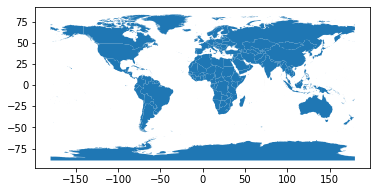

In [ ]:
gdf_paises.plot()

In [ ]:
gdf_paises['COUNTRY'].replace({"Bolivia":"Bolivia (Plurinational State of)",
                               "Czech Republic":"Czechia",
                               "Congo DRC":"Democratic Republic of the Congo",
                               "Iran":"Iran (Islamic Republic of)",
                               "Laos":"Lao People's Democratic Republic",
                               "Micronesia":"Micronesia (Federated States of)",
                               "South Korea":"Republic of Korea",
                               "Moldova":"Republic of Moldova",
                               "Eswatini":"Swaziland",
                               "Syria":"Syrian Arab Republic",
                               "United Kingdom":"United Kingdom of Great Britain and Northern Ireland",
                               "Tanzania":"United Republic of Tanzania",
                               "United States":"United States of America",
                               "Vietnam":"Viet Nam"},inplace=True)

In [ ]:
df_geometries= pd.merge(df_life,gdf_paises,left_on='Country',right_on='COUNTRY',how='left')
df_geometries

,Unnamed: 0,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,...,GDP,Population,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,0,Afghanistan,0,58.19375,269.0625,78.2500,34.960110,64.562500,2362.2500,15.51875,...,340.015425,9.972260e+06,192,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,1,Albania,0,75.15625,45.0625,0.6875,193.259091,98.000000,53.3750,49.06875,...,2119.726679,6.969116e+05,164,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,2,Algeria,0,73.61875,108.1875,20.3125,236.185241,78.000000,1943.8750,48.74375,...,2847.853392,2.164983e+07,125,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,3,Angola,0,49.01875,328.5625,83.7500,102.100268,70.222222,3561.3125,18.01875,...,1975.143045,1.014710e+07,96,Angola,AO,Angola,AO,58.873470,103.813059,"MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -..."
4,4,Antigua and Barbuda,0,75.05625,127.5000,0.0000,1001.585226,98.266667,0.0000,38.42500,...,9759.305728,8.486200e+04,29,Antigua and Barbuda,AG,Antigua and Barbuda,AG,1.162901,0.045626,"MULTIPOLYGON (((-61.73806 16.98972, -61.82917 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Vanuatu,0,71.38750,137.8750,0.0000,282.325746,56.125000,20.8750,44.25625,...,2000.245518,1.230962e+05,225,Vanuatu,VU,Vanuatu,VU,16.411468,1.037135,"MULTIPOLYGON (((167.10782 -15.12370, 167.13136..."
176,176,Viet Nam,0,74.77500,126.5625,29.1875,0.000000,87.538462,4232.9375,11.18750,...,1474.187500,8.603386e+07,232,Viet Nam,VN,Vietnam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
177,177,Yemen,0,63.86250,211.8125,39.3750,0.000000,55.687500,2761.1875,33.48750,...,2406.881250,2.406881e+03,208,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
178,178,Zambia,0,53.90625,354.3125,33.4375,89.650407,69.818182,6563.8125,17.45000,...,811.811841,6.260246e+06,114,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


# 03. Preparación de los datos

In [ ]:
df_geometries.columns

Index(['Unnamed: 0', 'Country', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'FID', 'COUNTRY',
       'ISO', 'COUNTRYAFF', 'AFF_ISO', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [ ]:
df_geometries.drop(['Unnamed: 0','FID', 'COUNTRY', 'ISO', 'COUNTRYAFF', 'AFF_ISO',
                    'SHAPE_Leng', 'SHAPE_Area'],axis=1,inplace=True)
df_geometries.columns

Index(['Country', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'GDP', 'Population', 'geometry'],
      dtype='object')

In [ ]:
df_geometries.columns=["País","Estatus","Esperanza de Vida","Mortalidad adulta","Muertes Infantiles",
                       "Porcentaje de Gastos","Hepatitis B","Sarampión","IMC","Muertes de menores de 5 años","Polio","Difteria",
                       "VIH/SIDA","PIB","Polación","geometry"]
df_geometries.columns      

Index(['País', 'Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles', 'Porcentaje de Gastos', 'Hepatitis B',
       'Sarampión', 'IMC', 'Muertes de menores de 5 años', 'Polio', 'Difteria',
       'VIH/SIDA', 'PIB', 'Polación', 'geometry'],
      dtype='object')

In [ ]:
X= df_geometries[['Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles','Porcentaje de Gastos', 'Hepatitis B', 'Sarampión', 'IMC',
       'Muertes de menores de 5 años', 'Polio', 'Difteria', 'VIH/SIDA', 'PIB',
       'Polación']]
X.shape

(180, 14)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.46499055, -1.19038796,  1.07522186,  0.40690425, -0.48296997,
        -0.41980166, -0.01274595, -1.41708287,  0.40958687, -2.11840575,
        -1.80436466, -0.37500043, -0.65217732, -0.12135706],
       [-0.46499055,  0.64840772, -1.24832059, -0.25832505, -0.37644401,
         0.96356525, -0.29707751,  0.69875974, -0.26425129,  0.99039308,
         0.95946546, -0.37500043, -0.49438477, -0.34205738],
       [-0.46499055,  0.48173722, -0.59352766, -0.09000757, -0.34755723,
         0.13613084, -0.06426767,  0.6782635 , -0.12166303,  0.59202941,
         0.58566876, -0.37500043, -0.42982769,  0.15650237],
       [-0.46499055, -2.18499078,  1.69241283,  0.45407603, -0.43778857,
        -0.18564921,  0.13491527, -1.25941949,  0.56797438, -2.25900469,
        -2.08376825,  0.13287662, -0.50720383, -0.11719688],
       [-0.46499055,  0.63756736, -0.39319992, -0.26422153,  0.16751221,
         0.97459771, -0.3036505 ,  0.02750788, -0.27017601,  0.91618809,
         0.97456836, -0.36

In [ ]:
pca=PCA(n_components=2)
X_scaled_pca=pca.fit_transform(X_scaled)
X_scaled_pca.shape

(180, 2)

In [ ]:
df_geometries["Dimension 1"]=X_scaled_pca[:,0]
df_geometries["Dimension 2"]=X_scaled_pca[:,1]
df_geometries.shape

(180, 18)

# 04. Clustering

## 04.1 K-Means

###04.1.1 Método del codo

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)

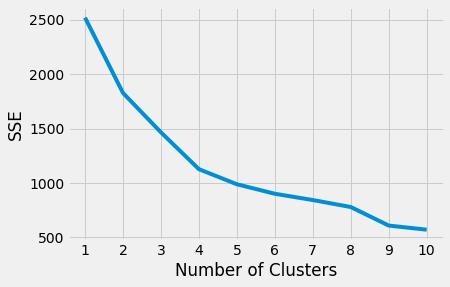

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

###04.1.2 K-Means implementación

In [ ]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=4, random_state=42)

Silhouette Coefficient

In [ ]:
labels = kmeans.labels_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.34381192387449017

In [ ]:
df_geometries["Kmeans"]=kmeans.labels_

In [ ]:
df_geometries["Kmeans"].value_counts()

3    93
0    55
1    28
2     4
Name: Kmeans, dtype: int64

In [ ]:
fig = px.scatter(df_geometries, x="Dimension 1", y="Dimension 2", color="Kmeans",
                 hover_data=['País'])
fig.show()

## 04.2 Affinity Propagation - *Adrián Landaverde Nava*
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation

In [ ]:
clustering = AffinityPropagation(random_state=5)
clustering.fit(X_scaled)
df_geometries["Affinity Propagation"]=clustering.labels_
df_geometries['Affinity Propagation'].value_counts().sort_index()

0      8
1     19
2     11
3      3
4      1
5     15
6      1
7     27
8     16
9      1
10    24
11    22
12     1
13     4
14     2
15     3
16     1
17     7
18     1
19     7
20     6
Name: Affinity Propagation, dtype: int64

In [ ]:
fig = px.scatter(df_geometries, x="Dimension 1", y="Dimension 2", color="Affinity Propagation",
                 hover_data=['País'])
fig.show()

In [ ]:
metrics.silhouette_score(X_scaled, clustering.labels_, metric='euclidean')

0.25183584181868046

## 04.3 Spectral clustering - *Naomi Padilla Mora*
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

Para conocer el número de clusters a implementar en el Spectral clustering se utilizó el método del codo, mismo que se observa en el apartado 4.1.1, con la diferencia que para este se utilizará el X_scaled_pca puesto que es necesario aplicar la reducción de dimensiones antes que llevar a cabo el método.

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X_scaled_pca)
  sse.append(kmeans.inertia_)

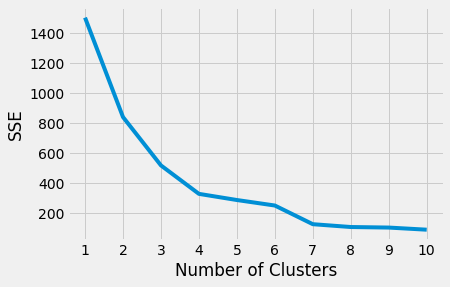

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

In [ ]:
clusterings = SpectralClustering(n_clusters=4,assign_labels='kmeans',random_state=0).fit(X_scaled_pca)
clusterings.labels_

array([0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [ ]:
df_geometries["Spectral Clustering"]=clusterings.labels_
df_geometries['Spectral Clustering'].value_counts().sort_index()

0    145
1      1
2      5
3     29
Name: Spectral Clustering, dtype: int64

In [ ]:
fig = px.scatter(df_geometries, x="Dimension 1", y="Dimension 2", color="Spectral Clustering",
                 hover_data=['País'])
fig.show()

In [ ]:
metrics.silhouette_score(X_scaled, clusterings.labels_, metric='euclidean')

0.35388461627917484

## 04.4 DBSCAN - *Sabrina Nicole Rodríguez Salgado*

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/

https://github.com/christianversloot/machine-learning-articles/blob/main/performing-dbscan-clustering-with-python-and-scikit-learn.md

Text(0, 0.5, 'Distancia')

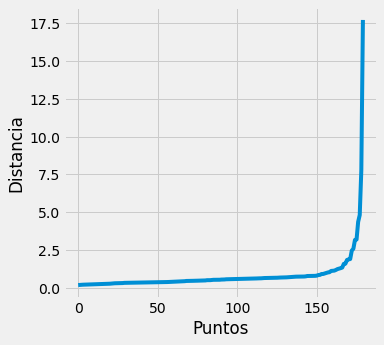

In [ ]:
#Para encontrar el mejor valor de epsilon:
dfEps = df_geometries.filter(['Dimension 1','Dimension 2'], axis=1)

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(dfEps)

distances, indices = neighbors.kneighbors(dfEps)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")

1.1105896604679124


<Figure size 360x360 with 0 Axes>

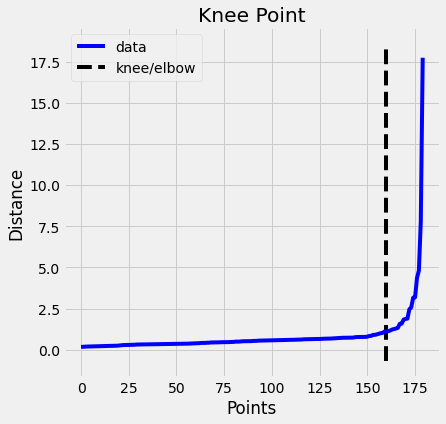

In [ ]:
#Para identificar el codo
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Valor óptimo de epsilon: 1.1105896604679124

In [ ]:
clusteringDBSCAN = DBSCAN(eps=1.1105896604679124, min_samples=3).fit(X_scaled)
clusteringDBSCAN.labels_

array([ 7,  0,  0, -1,  0,  0,  0,  1,  1,  0, -1,  0, -1,  0,  0,  2,  0,
        3,  0,  0,  0, -1,  4, -1,  2,  3,  0, -1,  3,  3, -1, -1, -1,  0,
       -1,  0,  3, -1,  0,  2,  0,  2,  2, -1, -1,  5,  3,  0,  0,  4,  0,
       -1,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  3,  6,  0,  0,  7, -1,
        0, -1,  0, -1,  5, -1, -1,  4, -1,  1,  6,  2,  0, -1,  0,  0,  3,
        0,  6,  0,  3,  2,  0, -1,  7,  0,  2, -1, -1, -1,  0,  0,  3, -1,
        3,  0,  0,  0,  0,  0,  0, -1,  3, -1,  3, -1, -1,  0, -1, -1,  5,
        0, -1,  0, -1,  0,  0, -1,  2,  2, -1, -1, -1,  2,  4,  0,  0,  0,
       -1,  0,  0,  3,  0,  0, -1, -1,  2, -1,  0, -1, -1, -1,  2,  0,  3,
        0, -1, -1, -1,  8,  0,  0,  3,  3,  0,  8,  0,  0,  0, -1, -1,  6,
       -1, -1, -1,  0,  0,  8, -1, -1, -1, -1])

In [ ]:
core_samples_mask = np.zeros_like(clusteringDBSCAN.labels_, dtype=bool)
core_samples_mask[clusteringDBSCAN.core_sample_indices_] = True
labels = clusteringDBSCAN.labels_

# Número de clusters para cada label, el ruido se ignora
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Número estimado de clusters: %d' % no_clusters)
print('Número estimado de puntos de ruido: %d' % no_noise)


Número estimado de clusters: 10
Número estimado de puntos de ruido: 62


In [ ]:
df_geometries["DBSCAN"]=clusteringDBSCAN.labels_
df_geometries["DBSCAN"].value_counts().sort_index()

-1    62
 0    68
 1     3
 2    13
 3    17
 4     4
 5     3
 6     4
 7     3
 8     3
Name: DBSCAN, dtype: int64

In [ ]:
fig = px.scatter(df_geometries, x="Dimension 1", y="Dimension 2", color="DBSCAN",hover_data=['País'])
fig.show()

In [ ]:
metrics.silhouette_score(X_scaled, clusteringDBSCAN.labels_, metric='euclidean')

-0.002850664119779683

# Visualización

In [ ]:
gdf_geometries = gpd.GeoDataFrame(df_geometries, geometry='geometry')
type(gdf_geometries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
map= folium.Map(location=[0,0],tiles="stamenwatercolor", zoom_start=3)
tiles = ['stamenwatercolor', 'cartodbpositron', 'openstreetmap', 'stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(map)
zones= gdf_geometries

KM = folium.Choropleth(
    geo_data=zones.__geo_interface__,
    name="K-means",
    data=gdf_geometries,
    columns=["País", "Kmeans"],
    key_on="feature.properties.País",
    fill_color="Set3",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Clustering por K-means"
).add_to(map)
KM.geojson.add_child(
    folium.features.GeoJsonTooltip(['País', 'Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles', 'Hepatitis B', 'Sarampión', 'IMC',
       'Muertes de menores de 5 años', 'Polio', 'Difteria', 'VIH/SIDA', 'PIB',
       'Polación','Kmeans'], labels=True))

AP = folium.Choropleth(
    geo_data=zones.__geo_interface__,
    name="Affinity Propagation",
    data=gdf_geometries,
    columns=["País", "Affinity Propagation"],
    key_on="feature.properties.País",
    fill_color="Accent",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Clustering por Affinity Propagation"
).add_to(map)
AP.geojson.add_child(
    folium.features.GeoJsonTooltip(['País', 'Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles', 'Hepatitis B', 'Sarampión', 'IMC',
       'Muertes de menores de 5 años', 'Polio', 'Difteria', 'VIH/SIDA', 'PIB',
       'Polación','Affinity Propagation'], labels=True))

DBScan = folium.Choropleth(
    geo_data=zones.__geo_interface__,
    name="DBSCAN",
    data=gdf_geometries,
    columns=["País", "DBSCAN"],
    key_on="feature.properties.País",
    fill_color="Set2",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Clustering por DBSCAN"
).add_to(map)
DBScan.geojson.add_child(
    folium.features.GeoJsonTooltip(['País', 'Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles', 'Hepatitis B', 'Sarampión', 'IMC',
       'Muertes de menores de 5 años', 'Polio', 'Difteria', 'VIH/SIDA', 'PIB',
       'Polación','DBSCAN'], labels=True))

SC = folium.Choropleth(
    geo_data=zones.__geo_interface__,
    name="Spectral Clustering",
    data=gdf_geometries,
    columns=["País", "Spectral Clustering"],
    key_on="feature.properties.País",
    fill_color="Dark2",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Clustering por Spectral Clustering"
).add_to(map)
SC.geojson.add_child(
    folium.features.GeoJsonTooltip(['País', 'Estatus', 'Esperanza de Vida', 'Mortalidad adulta',
       'Muertes Infantiles', 'Hepatitis B', 'Sarampión', 'IMC',
       'Muertes de menores de 5 años', 'Polio', 'Difteria', 'VIH/SIDA', 'PIB',
       'Polación','Spectral Clustering'], labels=True))

folium.LayerControl().add_to(map)
map

In [ ]:
map.save("MapaNoSupervisado.html")